# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12 guardian - student's guardian (nominal: "mother", "father" or "other")
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets . 
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.

In [ ]:
#load dataset (student Portuguese scores)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
myfile = files.upload()

Saving student-por.csv to student-por.csv


In [ ]:
d = pd.read_csv('student-por.csv', sep=';')
len(d)

649

In [ ]:
d['pass'] = d.apply(lambda row: 1 if (row['G1']+row['G2']+row['G3']) >= 35 else 0, axis=1)
d = d.drop(['G1', 'G2', 'G3'], axis=1)
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,1


In [ ]:
d = pd.get_dummies(d, columns=['sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob','reason',
                               'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 
                               'internet', 'romantic'])
d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,pass,sex_F,sex_M,school_GP,school_MS,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,2,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,3,3,6,1,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0


In [ ]:
d = d.sample(frac=1)
d_train = d[:500]
d_test = d[500:]

d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']

d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

d_att= d.drop(['pass'], axis=1)
d_pass = d['pass']

import numpy as np
print("passing: %d out of %d (%.2f%%)" % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)) / len(d_pass)))

passing: 328 out of 649 (50.54%)


In [ ]:
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
t = t.fit(d_train_att, d_train_pass)

In [ ]:
tree.export_graphviz(t, out_file="student-performance.dot", label="all", impurity=False, proportion=True,
                     feature_names=list(d_train_att), class_names=["fail", "pass"], 
                     filled=True, rounded=True)

In [ ]:
t.score(d_test_att, d_test_pass)
predict=t.predict(d_test_att)
print(predict)

import collections, numpy
a = collections.Counter(predict)
print(a)


[0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1
 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0
 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0
 1]
Counter({1: 99, 0: 50})


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(t, d_att, d_pass, cv=5)
# show average score and +/- two standard deviations away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.10)


In [ ]:
for max_depth in range(1, 20):
  t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
  scores = cross_val_score(t, d_att, d_pass, cv=5)
  print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std()*2))

Max depth: 1, Accuracy: 0.64 (+/- 0.04)
Max depth: 2, Accuracy: 0.69 (+/- 0.04)
Max depth: 3, Accuracy: 0.68 (+/- 0.06)
Max depth: 4, Accuracy: 0.69 (+/- 0.07)
Max depth: 5, Accuracy: 0.67 (+/- 0.10)
Max depth: 6, Accuracy: 0.69 (+/- 0.07)
Max depth: 7, Accuracy: 0.68 (+/- 0.05)
Max depth: 8, Accuracy: 0.65 (+/- 0.07)
Max depth: 9, Accuracy: 0.66 (+/- 0.07)
Max depth: 10, Accuracy: 0.67 (+/- 0.07)
Max depth: 11, Accuracy: 0.64 (+/- 0.06)
Max depth: 12, Accuracy: 0.65 (+/- 0.05)
Max depth: 13, Accuracy: 0.65 (+/- 0.07)
Max depth: 14, Accuracy: 0.64 (+/- 0.05)
Max depth: 15, Accuracy: 0.64 (+/- 0.08)
Max depth: 16, Accuracy: 0.64 (+/- 0.10)
Max depth: 17, Accuracy: 0.63 (+/- 0.07)
Max depth: 18, Accuracy: 0.63 (+/- 0.07)
Max depth: 19, Accuracy: 0.65 (+/- 0.05)


In [ ]:
depth_acc = np.empty((19,3), float)
i = 0
for max_depth in range(1, 20):
  t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
  scores = cross_val_score(t, d_att, d_pass, cv=5)
  depth_acc[i,0] = max_depth
  depth_acc[i,1] = scores.mean()
  depth_acc[i,2] = scores.std() * 2
  i += 1

depth_acc

array([[ 1.        ,  0.63787716,  0.03616845],
       [ 2.        ,  0.68715564,  0.04149121],
       [ 3.        ,  0.68407871,  0.05542223],
       [ 4.        ,  0.68555754,  0.07724608],
       [ 5.        ,  0.66862254,  0.11439589],
       [ 6.        ,  0.69484794,  0.06778483],
       [ 7.        ,  0.67487179,  0.07518725],
       [ 8.        ,  0.65788909,  0.06740844],
       [ 9.        ,  0.67477639,  0.09176331],
       [10.        ,  0.66870602,  0.05363706],
       [11.        ,  0.65018485,  0.05058255],
       [12.        ,  0.653226  ,  0.05828857],
       [13.        ,  0.65943948,  0.04402608],
       [14.        ,  0.65631485,  0.07975866],
       [15.        ,  0.63630292,  0.07499105],
       [16.        ,  0.65481216,  0.05386468],
       [17.        ,  0.63478831,  0.06717836],
       [18.        ,  0.6532737 ,  0.08873691],
       [19.        ,  0.61320215,  0.06310378]])

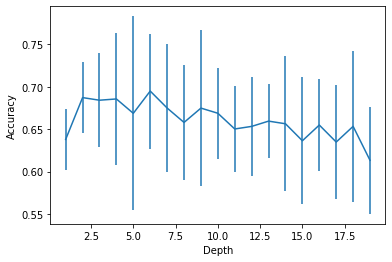

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])

ax.set_xlabel('Depth')
ax.set_ylabel('Accuracy')

plt.show()

Confusion matrix, without normalization
[[37 40]
 [13 59]]


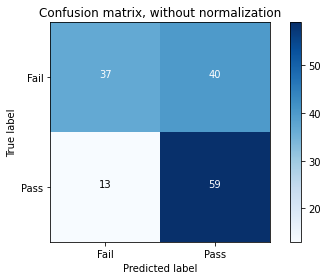

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

from sklearn import metrics
from sklearn.metrics import confusion_matrix


# Compute confusion matrix
cnf_matrix = confusion_matrix(d_test_pass,predict )
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fail','Pass'],
                      title='Confusion matrix, without normalization')